In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

In [2]:
path = "./data/shapefiles/tl_2020_37_tabblock20.shp"

In [3]:
df = gpd.read_file(path)
df.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,HOUSING20,POP20,geometry
0,37,085,070904,1016,370850709041016,Block 1016,G5040,R,None,None,S,223704,0,+35.5203352,-078.7429098,135,236,"POLYGON ((-78.74612 35.51781, -78.74593 35.517..."
1,37,105,030300,2040,371050303002040,Block 2040,G5040,U,78877,U,S,8225,0,+35.4689037,-079.1609933,0,0,"POLYGON ((-79.16192 35.46852, -79.16154 35.469..."
2,37,085,070200,3007,370850702003007,Block 3007,G5040,U,25039,U,S,13928,0,+35.3100898,-078.6080862,6,14,"POLYGON ((-78.60900 35.30999, -78.60828 35.310..."
3,37,085,070500,3022,370850705003022,Block 3022,G5040,U,25039,U,S,142908,0,+35.3189133,-078.6570878,26,45,"POLYGON ((-78.65879 35.31721, -78.65876 35.317..."
4,37,085,070401,1041,370850704011041,Block 1041,G5040,U,25039,U,S,20698,0,+35.3546270,-078.6628098,16,46,"POLYGON ((-78.66407 35.35466, -78.66371 35.355..."


In [4]:
census_df = pd.read_csv("./data/nc/DECENNIALPL2020.P1-Data-block.csv")

c:\ProgramData\Anaconda3\envs\gerrymandering\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
census_df = census_df[census_df["NAME"].str.contains("Census Tract")]
census_df = census_df[["GEO_ID", "NAME", "P1_001N", "P1_003N"]] # P1_001N = Total Population, P1_003N = White alone
census_df["P1_001N"] = census_df["P1_001N"].astype(int)
census_df["P1_003N"] = census_df["P1_003N"].astype(int)
census_df = census_df[census_df["P1_001N"] > 0]
census_df["poc_prop"] = 1 - census_df["P1_003N"] / census_df["P1_001N"]
census_df["poc_count"] = census_df["P1_001N"] - census_df["P1_003N"]
census_df.head()

,GEO_ID,NAME,P1_001N,P1_003N,poc_prop,poc_count
2,1000000US370010201001001,"Block 1001, Block Group 1, Census Tract 201, A...",34,28,0.176471,6
3,1000000US370010201001002,"Block 1002, Block Group 1, Census Tract 201, A...",30,14,0.533333,16
4,1000000US370010201001003,"Block 1003, Block Group 1, Census Tract 201, A...",34,22,0.352941,12
5,1000000US370010201001004,"Block 1004, Block Group 1, Census Tract 201, A...",60,38,0.366667,22
6,1000000US370010201001005,"Block 1005, Block Group 1, Census Tract 201, A...",30,17,0.433333,13


In [6]:
census_df["GEOID"] = census_df["GEO_ID"].str[9:] # Remove the first 9 characters of the GEO_ID column to match map data

In [7]:
census_df.head()

,GEO_ID,NAME,P1_001N,P1_003N,poc_prop,poc_count,GEOID
2,1000000US370010201001001,"Block 1001, Block Group 1, Census Tract 201, A...",34,28,0.176471,6,370010201001001
3,1000000US370010201001002,"Block 1002, Block Group 1, Census Tract 201, A...",30,14,0.533333,16,370010201001002
4,1000000US370010201001003,"Block 1003, Block Group 1, Census Tract 201, A...",34,22,0.352941,12,370010201001003
5,1000000US370010201001004,"Block 1004, Block Group 1, Census Tract 201, A...",60,38,0.366667,22,370010201001004
6,1000000US370010201001005,"Block 1005, Block Group 1, Census Tract 201, A...",30,17,0.433333,13,370010201001005


In [8]:
race_map = df.merge(census_df, left_on="GEOID20", right_on="GEOID", validate="one_to_one")

In [9]:
race_map.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,HOUSING20,POP20,geometry,GEO_ID,NAME,P1_001N,P1_003N,poc_prop,poc_count,GEOID
0,37,085,070904,1016,370850709041016,Block 1016,G5040,R,None,None,...,135,236,"POLYGON ((-78.74612 35.51781, -78.74593 35.517...",1000000US370850709041016,"Block 1016, Block Group 1, Census Tract 709.04...",236,67,0.716102,169,370850709041016
1,37,085,070200,3007,370850702003007,Block 3007,G5040,U,25039,U,...,6,14,"POLYGON ((-78.60900 35.30999, -78.60828 35.310...",1000000US370850702003007,"Block 3007, Block Group 3, Census Tract 702, H...",14,0,1.000000,14,370850702003007
2,37,085,070500,3022,370850705003022,Block 3022,G5040,U,25039,U,...,26,45,"POLYGON ((-78.65879 35.31721, -78.65876 35.317...",1000000US370850705003022,"Block 3022, Block Group 3, Census Tract 705, H...",45,26,0.422222,19,370850705003022
3,37,085,070401,1041,370850704011041,Block 1041,G5040,U,25039,U,...,16,46,"POLYGON ((-78.66407 35.35466, -78.66371 35.355...",1000000US370850704011041,"Block 1041, Block Group 1, Census Tract 704.01...",46,9,0.804348,37,370850704011041
4,37,161,960800,1014,371619608001014,Block 1014,G5040,U,30331,U,...,32,70,"POLYGON ((-81.89831 35.33971, -81.89827 35.339...",1000000US371619608001014,"Block 1014, Block Group 1, Census Tract 9608, ...",70,13,0.814286,57,371619608001014


In [10]:
districts_df = gpd.read_file("./data/shapefiles/Interim Congressional.shp")
districts_df

,DISTRICT,PL20AA_TOT,geometry
0,1,745670,"POLYGON ((748019.999 187054.611, 747998.837 18..."
1,10,745670,"POLYGON ((353671.775 206087.462, 353661.231 20..."
2,11,745671,"POLYGON ((339228.332 163474.331, 339228.113 16..."
3,12,745671,"POLYGON ((464579.507 173485.575, 464573.033 17..."
4,13,745670,"POLYGON ((672671.439 170786.652, 672669.897 17..."
5,14,745671,"POLYGON ((456329.176 151431.659, 456326.397 15..."
6,2,745671,"POLYGON ((614396.099 220906.804, 614401.967 22..."
7,3,745670,"POLYGON ((829681.752 313430.490, 829713.352 31..."
8,4,745670,"POLYGON ((560698.694 238622.398, 560707.196 23..."
9,5,745670,"POLYGON ((344151.224 249103.478, 344130.159 24..."


In [11]:
districts_df = districts_df.to_crs("EPSG:4326")
race_map = race_map.to_crs("EPSG:4326")

In [12]:
race_map['poc_count'].describe()

count    174988.000000
mean         22.578285
std          54.810734
min           0.000000
25%           3.000000
50%           8.000000
75%          21.000000
max        3191.000000
Name: poc_count, dtype: float64

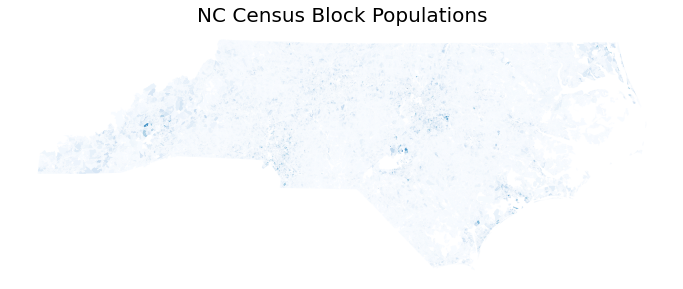

In [13]:
fig2, ax2 = plt.subplots(figsize=(12,12))
# districts_df.geometry.boundary.plot(ax=ax, edgecolor='k', linewidth=1)
race_map.plot(ax=ax2, column='P1_001N', cmap='Blues', legend=False)
ax2.set_title('NC Census Block Populations', fontsize=20)
ax2.axis('off')
plt.savefig('images/nc-blocks-population.png')

In [14]:
fig, ax = plt.subplots(figsize=(12,12))
districts_df.geometry.boundary.plot(ax=ax, edgecolor='k', linewidth=1)
race_map.plot(ax=ax, column='poc_prop', cmap='Blues', legend=False)
ax.set_title('NC Congressional Maps', fontsize=20)
ax.axis('off')
plt.savefig('images/nc-maps.png')

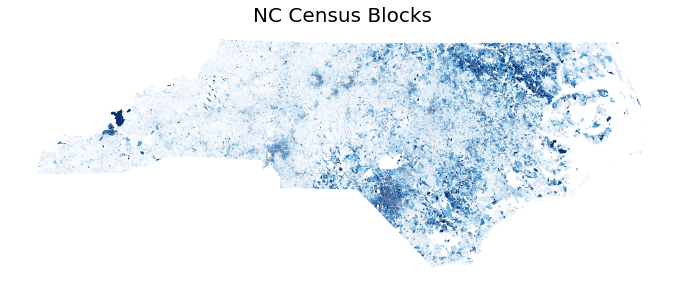

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
# districts_df.geometry.boundary.plot(ax=ax, edgecolor='k', linewidth=1)
race_map.plot(ax=ax, column='poc_prop', cmap='Blues', legend=False)
ax.set_title('NC Census Blocks', fontsize=20)
ax.axis('off')
plt.savefig('images/nc-blocks.png')